In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/archive/TSLA.csv')
df.head()


In [ ]:
df.shape


In [ ]:
df.info()


In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df[df['Close'] == df['Adj Close']].shape


In [ ]:
df = df.drop(['Adj Close'], axis=1)


In [ ]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

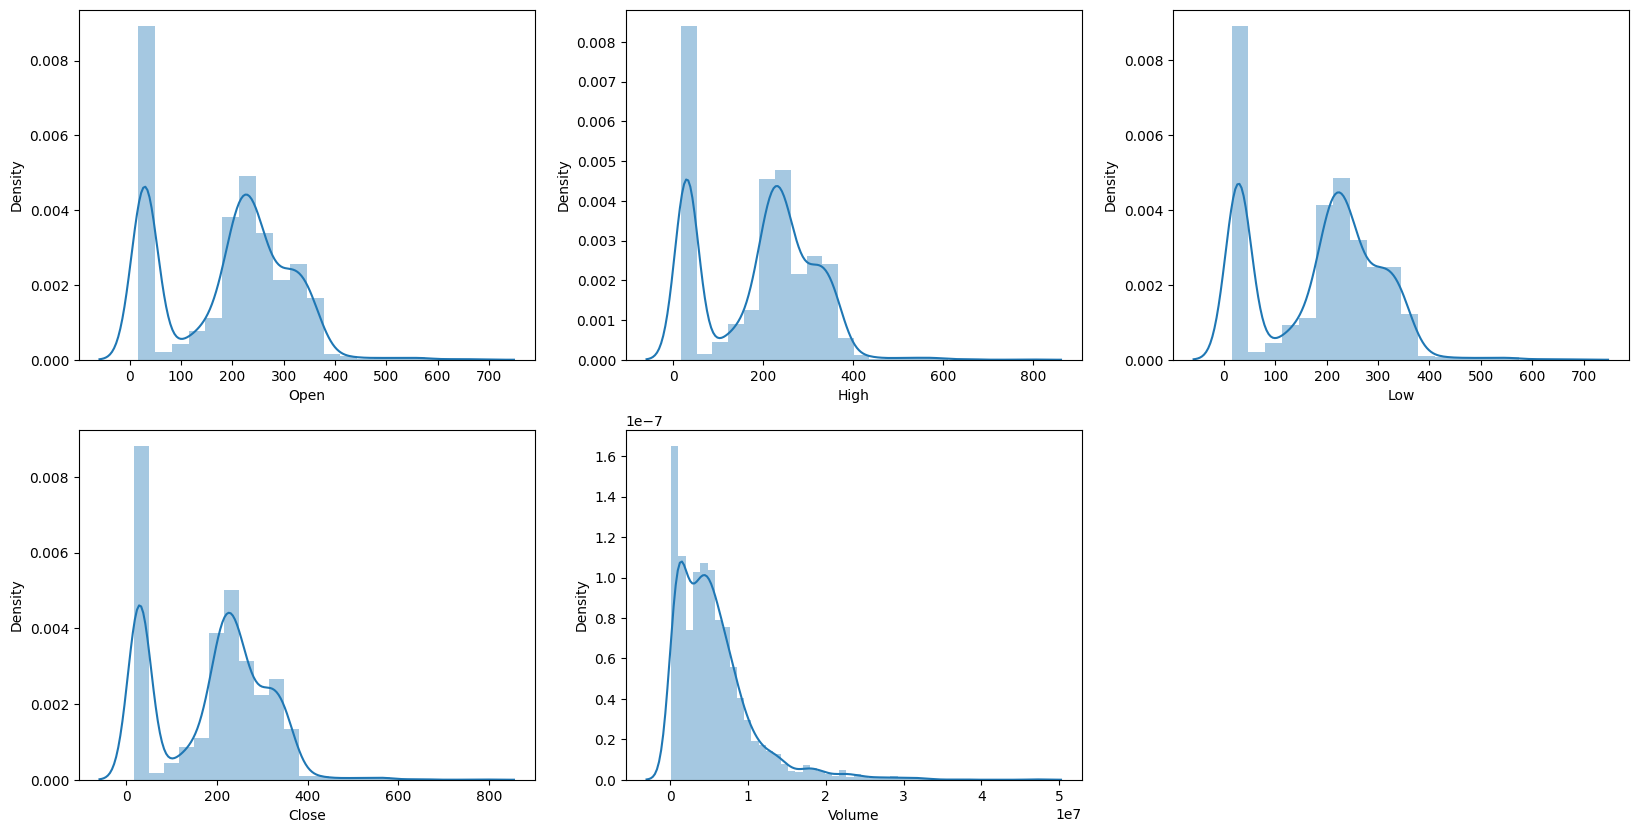

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


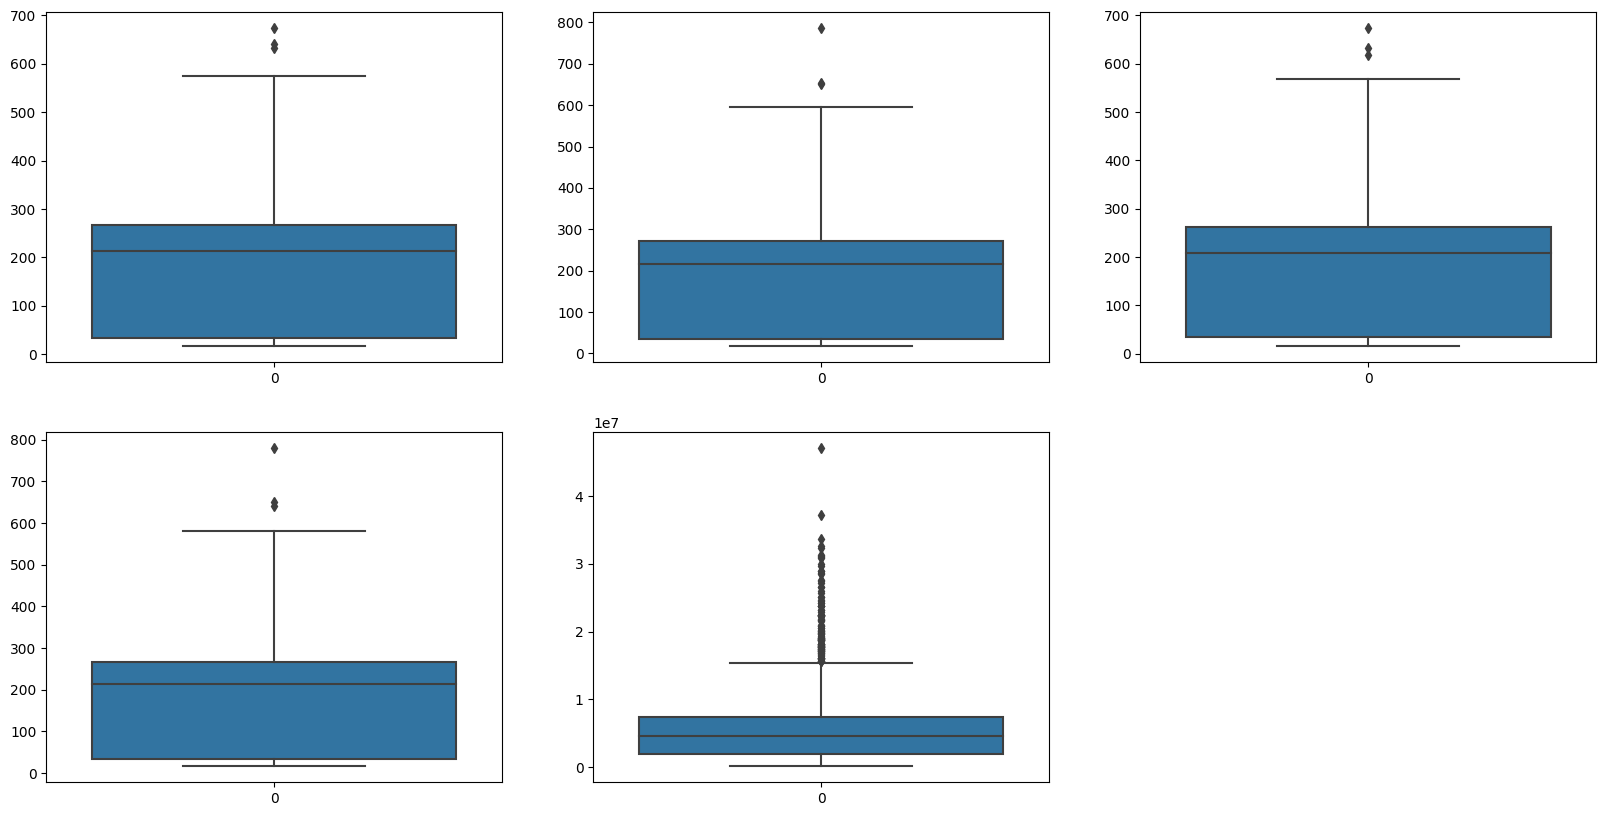

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted [1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2,1
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6,1


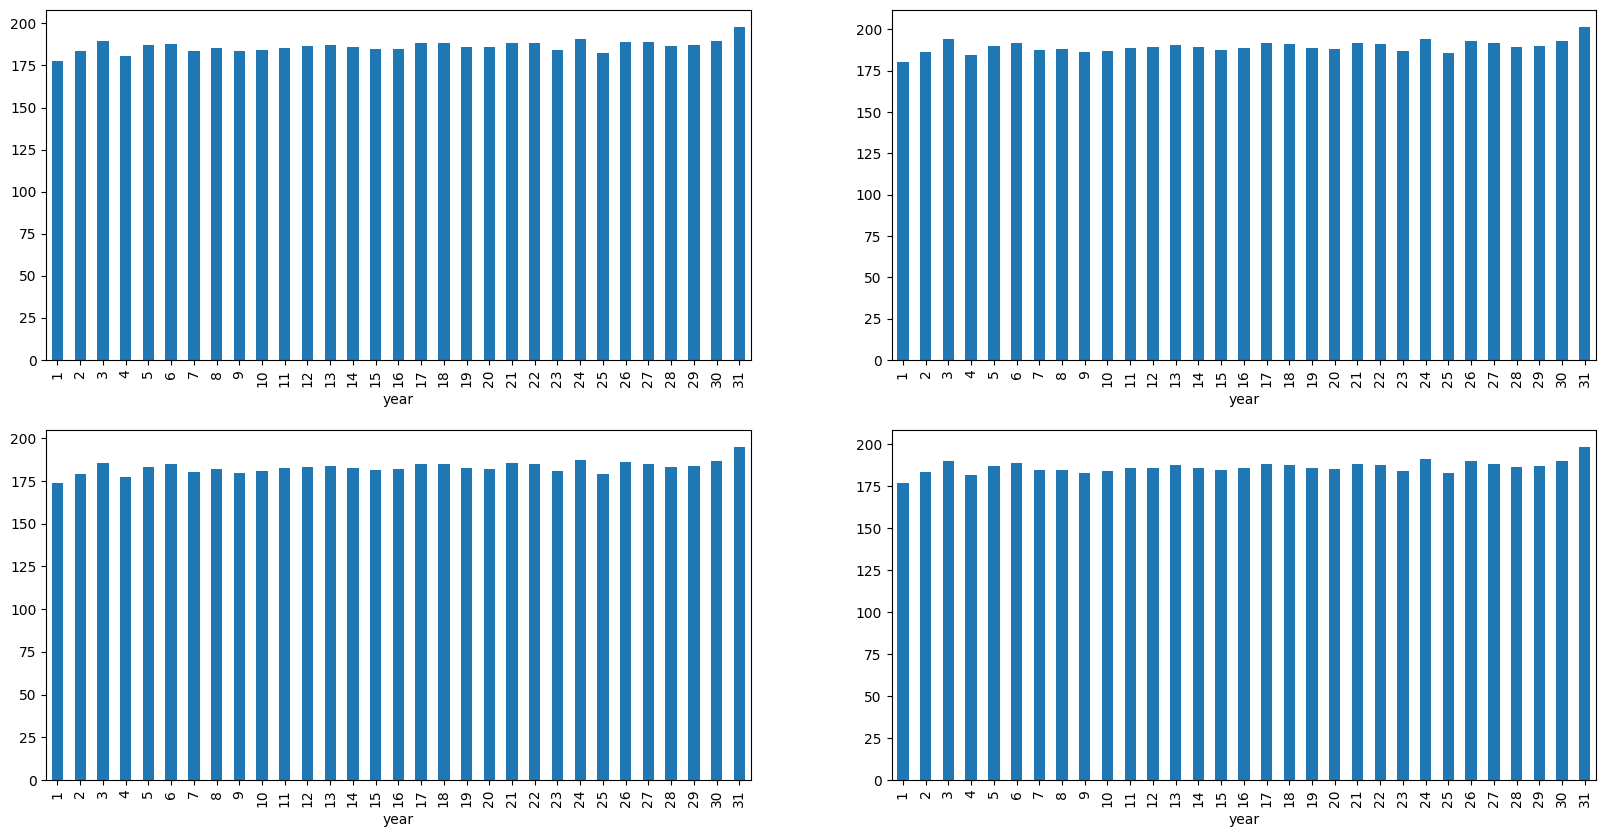

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()



In [ ]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,195.383850,198.830719,191.934386,195.566477,5.012534e+06,6.455556,2014.578431,15.760784
1,170.534763,173.600440,167.344233,170.580711,6.540089e+06,6.972912,2015.119639,15.726862


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


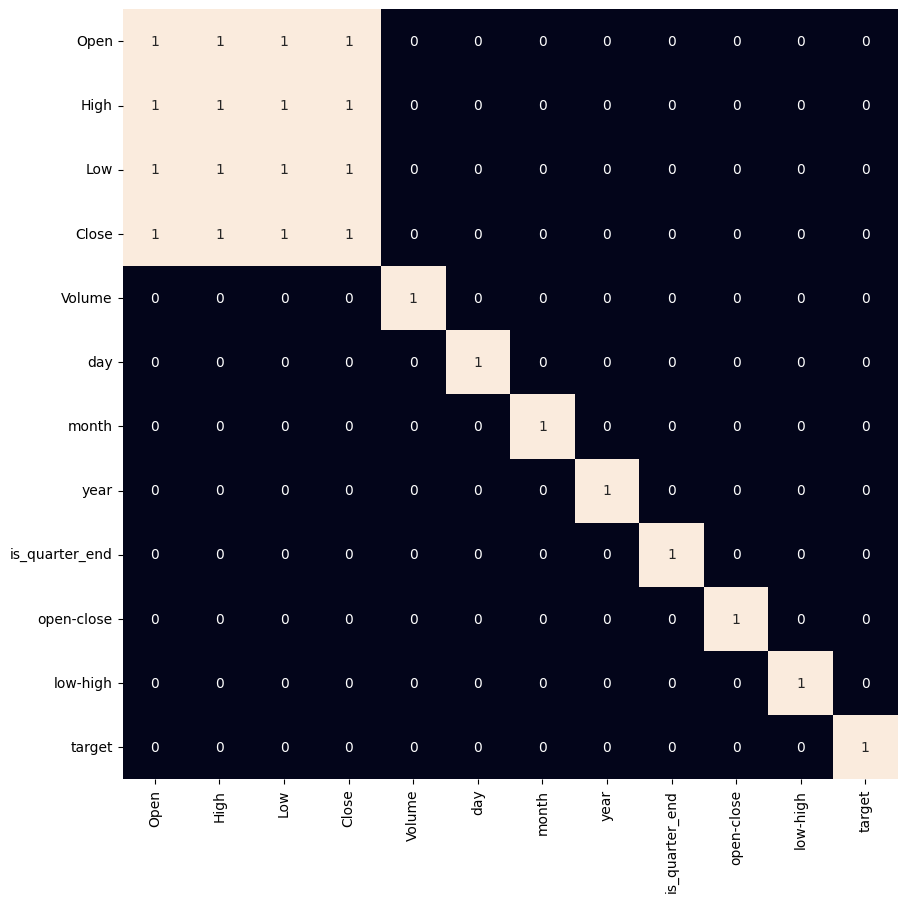

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


In [ ]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
	    Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
	    Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


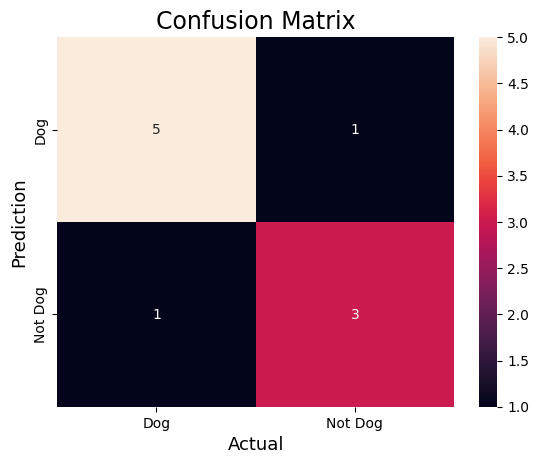

In [ ]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Create the NumPy array for actual and predicted labels.
actual = np.array(
['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])

#compute the confusion matrix.
cm = confusion_matrix(actual,predicted)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['Dog','Not Dog'],
			yticklabels=['Dog','Not Dog'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


927/927 - 36s - loss: 2.8808e-04 - 36s/epoch - 39ms/step
45/45 [==============================] - 3s 26ms/step


<ipython-input-3-75f6ce621094>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = closing_price
<ipython-input-3-75f6ce621094>:79: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


NameError: ignored

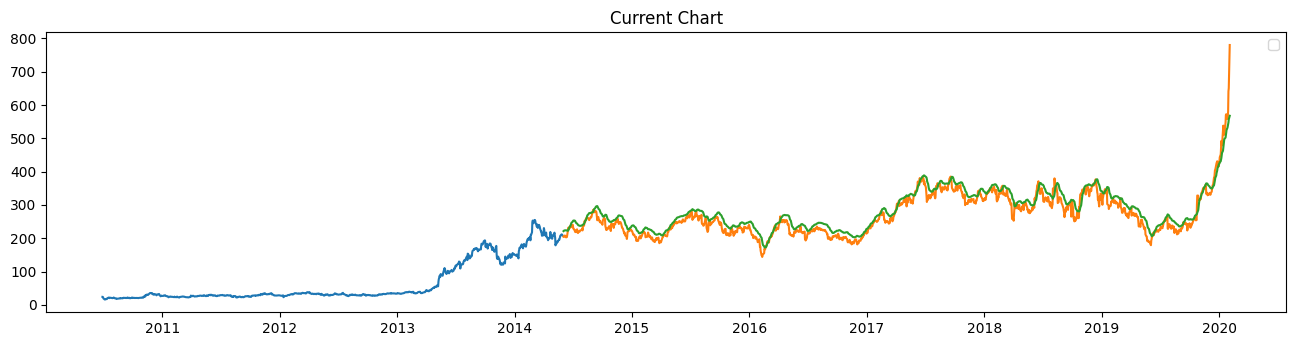

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv("/content/drive/MyDrive/archive/TSLA.csv")
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df['Date']

plt.figure(figsize=(16, 8))
plt.plot(df["Close"], label='Close Price history')

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_dataset["Date"][i] = data['Date'][i]
    new_dataset["Close"][i] = data["Close"][i]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)

final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

inputs_data = new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = lstm_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

lstm_model.save("saved_lstm_model.h5")

train_data = new_dataset[:987]
valid_data = new_dataset[987:]
valid_data['Predictions'] = closing_price

# Plot current chart
plt.subplot(2, 1, 1)
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', 'Predictions']])
plt.title('Current Chart')
plt.legend()

# Generate future dates beyond available data
last_date = new_dataset.index[-1]
future_dates = pd.date_range(start=last_date, periods=len(valid_data) + len(X_future), freq='D')  # Generate dates for available data and future predictions

# Plot future price chart
plt.subplot(2, 1, 2)
plt.plot(future_dates[len(valid_data):], future_price, label='Future Price')
plt.title('Future Price Chart')
plt.legend()


# Scale the input data for future predictions
future_inputs = future_dates[-len(X_future):].values
future_inputs = future_inputs.reshape(-1, 1)
future_inputs = scaler.transform(future_inputs)

# Prepare future prediction data
X_future = []
for i in range(len(future_inputs) - 60, len(future_inputs)):
    X_future.append(future_inputs[i-60:i, 0])
X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))
future_price = lstm_model.predict(X_future)
future_price = scaler.inverse_transform(future_price)

# Plot future price chart
plt.subplot(2, 1, 2)
plt.plot(future_dates[-len(X_future):], future_price, label='Future Price')
plt.title('Future Price Chart')
plt.legend()


plt.tight_layout()
plt.show()


# New Section